In [1]:
# pip install shap catboost

In [1]:
import pandas as pd
import numpy as np
import modules
import random

from scipy.stats import beta
from modules import ml_functions
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

New version file.py

# 1.0 Data retrieval

In [2]:
df = pd.read_pickle('../../data_lake/output/2_dp.pkl')

In [3]:
df.sample(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
SegFile,,,,,,,,,,,,,,,,,,,,,,,
CTG2030.txt,129.0,129.0,0.0,1.0,6.0,65.0,2.8,0.0,0.0,9.0,0.0,2.0,101.0,50.0,151.0,7.0,2.0,105.0,86.0,112.0,13.0,0.0,3.0


# 2.0 Data preparation

In [4]:
df_ml = df.copy()

# 3.0 Modeling
## 3.1 Classe 1

In [5]:
class_nsp = 1.0

In [6]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [7]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(942, 22)
AUC Score:  0.47766516516516516
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [8]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.9701195  0.97377123 0.98406307 0.98505865]

Mean CV Scores: 
[0.93625607 0.93492274 0.93891391 0.93893157]

Best Parameters: 
{'model__depth': 4, 'model__iterations': 1000}



Test results...
Model Test Accuracy: 0.9365079365079365
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'ASTV', 'MSTV', 'ALTV', 'DP', 'Mean', 'Mode', 'UC', 'Median', 'Variance']


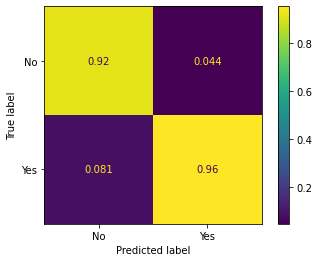

In [9]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [10]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

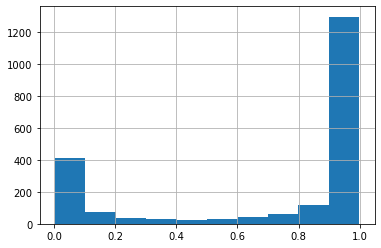

In [11]:
df['proba_classe_1.0'].hist()

## 3.2 Classe 2

In [13]:
class_nsp = 2.0

In [14]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [15]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(590, 22)
AUC Score:  0.5670000000000001
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [16]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.91527053 0.91889041 0.94189691 0.94249565]

Mean CV Scores: 
[0.8645313  0.86215104 0.88145754 0.87910667]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 100}



Test results...
Model Test Accuracy: 0.9378531073446328
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'MSTV', 'ASTV', 'ALTV', 'Mode', 'MLTV', 'DP', 'Mean', 'Nmax', 'LBE']


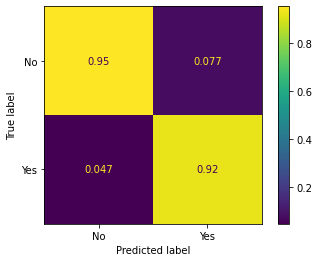

In [17]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [18]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

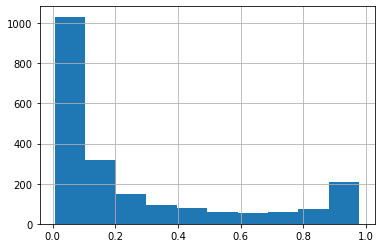

In [19]:
df['proba_classe_2.0'].hist()

## 3.3 Classe 3

In [20]:
class_nsp = 3.0

In [21]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [22]:
X_train, X_test, y_train, y_test, numerical_cols, categorical_cols, parameters = ml_functions.data_splitting(df_model)

(352, 22)
AUC Score:  0.568218954248366
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar


In [23]:
model = ml_functions.model_training(X_train, y_train, numerical_cols, categorical_cols, parameters)

GridSearchCV results...
Mean Train Scores: 
[0.98983736 0.98882213 0.99491868 0.99695431]

Mean CV Scores: 
[0.94710204 0.94710204 0.94710204 0.95118367]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 200}



Test results...
Model Test Accuracy: 0.9528301886792453
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['Mean', 'ASTV', 'ALTV', 'DP', 'Median', 'Mode', 'MSTV', 'Variance', 'AC', 'MLTV']


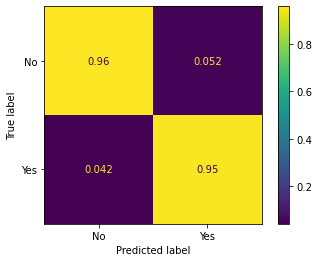

In [24]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [25]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

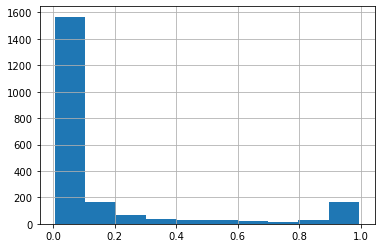

In [26]:
df['proba_classe_3.0'].hist()

# 4.0 Normalizing results & Beta correction

In [27]:
cols = ['proba_classe_1.0','proba_classe_2.0', 'proba_classe_3.0']

In [28]:
df[cols] = df[cols].apply(lambda x: x / x.sum(),axis=1)

In [29]:
df.sample(4)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG1755.txt,134.0,134.0,4.0,1.0,1.0,61.0,1.8,0.0,0.0,3.0,0.0,3.0,118.0,66.0,184.0,6.0,0.0,88.0,112.0,111.0,182.0,-1.0,3.0,0.031101,0.047439,0.921460
CTG0339.txt,137.0,137.0,0.0,14.0,0.0,65.0,0.4,11.0,8.1,0.0,0.0,0.0,20.0,133.0,153.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,2.0,0.033978,0.856435,0.109587
CTG0812.txt,146.0,146.0,3.0,0.0,4.0,37.0,1.3,31.0,7.2,3.0,0.0,0.0,79.0,93.0,172.0,2.0,2.0,162.0,152.0,156.0,23.0,1.0,1.0,0.866481,0.120678,0.012841
CTG0259.txt,127.0,127.0,6.0,0.0,4.0,13.0,3.8,0.0,1.3,2.0,0.0,0.0,138.0,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,1.0,0.958776,0.022182,0.019042


Beta correction

In [30]:
xax = np.linspace(0,1.0,100)

In [31]:
num_classe = dict()
tot = 0
for i in df['NSP'].unique():
    num = df[df['NSP']==i].shape[0]
    tot = tot + num
    num_classe[i] = dict()
    num_classe[i]['num'] = num

In [32]:
for i in num_classe:
    num_classe[i]['wei'] = num_classe[i]['num'] / tot
    num_classe[i]['k'] = num_classe[i]['num'] * num_classe[i]['wei']

In [33]:
df['proba_classe_1.0_beta'] = df['proba_classe_1.0'].apply(lambda x: beta.pdf(xax,(x * (num_classe['1.0']['k']-2)+1),((1-x) * (num_classe['1.0']['k']-2)+1)))
df['proba_classe_2.0_beta'] = df['proba_classe_2.0'].apply(lambda x: beta.pdf(xax,(x * (num_classe['2.0']['k']-2)+1),((1-x) * (num_classe['2.0']['k']-2)+1)))
df['proba_classe_3.0_beta'] = df['proba_classe_3.0'].apply(lambda x: beta.pdf(xax,(x * (num_classe['3.0']['k']-2)+1),((1-x) * (num_classe['3.0']['k']-2)+1)))

In [34]:
index = random.randint(0,2126)

In [35]:
index

1704

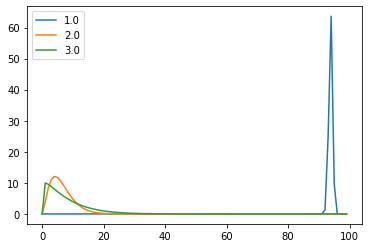

In [36]:
plt.plot(df['proba_classe_1.0_beta'][index],label='1.0')
plt.plot(df['proba_classe_2.0_beta'][index],label='2.0')
plt.plot(df['proba_classe_3.0_beta'][index],label='3.0')
plt.legend()

# 5.0 Output

In [38]:
df.to_pickle('../../data_lake/output/3_mod.pkl')